In [1]:
import pandas as pd
import numpy as np
%pylab inline
data = pd.read_csv('credit_card_default_analysis.csv', index_col='ID')

Populating the interactive namespace from numpy and matplotlib


Отделим данные, соответствующие default == 1 (data_default), от данный, соответствующих default == 0 (data_ok).

In [2]:
data_default = data.copy()
data_default = data_default[data_default['default']==1]
data_ok = data.copy()
data_ok = data_ok[data_ok['default']==0]

Посмотрим на распределения признака LIMIT_BAL

Медиана LIMIT_BAL при default==1 =  90000.0 , среднее =  130109.65642
Медиана LIMIT_BAL при default==0 =  150000.0 , среднее =  178099.726074


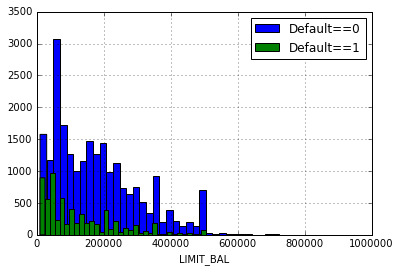

In [37]:
print 'Медиана LIMIT_BAL при default==1 = ', data_default['LIMIT_BAL'].median(), ', среднее = ', data_default['LIMIT_BAL'].mean()
print 'Медиана LIMIT_BAL при default==0 = ', data_ok['LIMIT_BAL'].median(), ', среднее = ', data_ok['LIMIT_BAL'].mean()
p1 = data_ok['LIMIT_BAL'].hist(bins=50,label='Default==0')
data_default['LIMIT_BAL'].hist(bins=50,label='Default==1')
p1.set_xlabel('LIMIT_BAL')
pylab.legend(loc='upper right')
pylab.show()

Видно, что у клиентов с default==1 кредитный лимит был в среднем значительно ниже. Проверим это строго. Построим доверительные интервалы для медиан с помощью бутстрепа, а в качестве второго способа проверки используем критерий Манна-Уитни (будем проверять гипотезу равенства распределений против альтернативы сдвига).

In [10]:
from scipy.stats import mannwhitneyu
def get_bootstrap_samples(data, n_samples):
    indices = np.random.randint(0, len(data), (n_samples, len(data)))
    samples = data[indices]
    return samples
def stat_intervals(stat, alpha):
    boundaries = np.percentile(stat, [100 * alpha / 2., 100 * (1 - alpha / 2.)])
    return boundaries
print '95% доверительный интервал для медианы LIMIT_BAL при default==1 = ', \
                stat_intervals(get_bootstrap_samples(data_default['LIMIT_BAL'].values,1000),0.05)
print '95% доверительный интервал для медианы LIMIT_BAL при default==0 = ', \
                stat_intervals(get_bootstrap_samples(data_ok['LIMIT_BAL'].values,1000),0.05)
print mannwhitneyu(data_default['LIMIT_BAL'],data_ok['LIMIT_BAL'],alternative='two-sided')


95% доверительный интервал для медианы LIMIT_BAL при default==1 =  [  10000.  440000.]
95% доверительный интервал для медианы LIMIT_BAL при default==0 =  [  20000.  500000.]
MannwhitneyuResult(statistic=59257217.5, pvalue=1.2255485818223303e-189)


Бутстреп особенно сильно не помог, а вот критерий Манна-Уитни уверенно отвергает гипотезу о равенстве распределений.
С практической точки зрения этот результат не особенно важен, он лишь свидетельствует о том, что алгоритм расчета кредитного лимита в какой-то степени работает (людям, склонным не платить, выделяется меньший лимит).

Будем исследовать зависимость от пола. Для удобства изменим обозначения признака SEX: 0 будет означать мужской, 1 - женский. Для этого нужно вычесть 1 из каждого значения соответствующего признака.
Поскольку данных достаточно много, для доли (в нашем случае доли женщин) мы можем строить доверительные интервалы, пользуясь нормальной аппроксимацией.

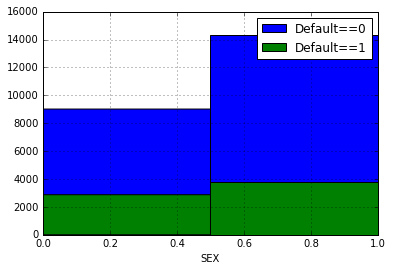

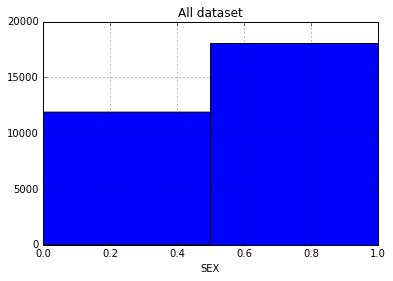

Среднее значение SEX по всей выборке =  0.603733333333
Среднее значение SEX при default==1 =  0.567058468957
Среднее значение SEX при default==0 =  0.614149974319
95% доверительный интервал для доли женщин по всей выборке =  (0.59819850937854668, 0.60926815728812)
95% доверительный интервал для доли женщин при default==1 =  (0.55513717362381065, 0.57897976429059561)
95% доверительный интервал для доли женщин при default==0 =  (0.60790801436660435, 0.62039193427232731)
95% доверительный интервал вероятности дефолта для женщин:  (0.20185432056295824, 0.21367129781160007)
95% доверительный интервал вероятности дефолта для мужчин:  (0.23397679702375163, 0.2493677521014166)


In [68]:
data = pd.read_csv('credit_card_default_analysis.csv', index_col='ID')
data_default = data.copy()
data_default = data_default[data_default['default']==1]
data_ok = data.copy()
data_ok = data_ok[data_ok['default']==0]
data['SEX'] -= 1
data_default['SEX'] -= 1
data_ok['SEX'] -= 1

p1 = data_ok['SEX'].hist(bins=2,label='Default==0')
data_default['SEX'].hist(bins=2,label='Default==1')
p1.set_xlabel('SEX')
pylab.legend(loc='upper right')
pylab.show()
p2 = data['SEX'].hist(bins=2)
p2.set_title('All dataset')
p2.set_xlabel('SEX')
pylab.show()
print 'Среднее значение SEX по всей выборке = ', data['SEX'].mean()
print 'Среднее значение SEX при default==1 = ', data_default['SEX'].mean()
print 'Среднее значение SEX при default==0 = ', data_ok['SEX'].mean()
from statsmodels.stats.proportion import proportion_confint
print '95% доверительный интервал для доли женщин по всей выборке = ', \
                            proportion_confint(data['SEX'].sum(),len(data),0.05,method = 'normal')
print '95% доверительный интервал для доли женщин при default==1 = ', \
                            proportion_confint(data_default['SEX'].sum(),len(data_default),0.05,method = 'normal')
print '95% доверительный интервал для доли женщин при default==0 = ', \
                            proportion_confint(data_ok['SEX'].sum(),len(data_ok),0.05,method = 'normal')
women_count = data['SEX'].sum()
women_default_count = data_default['SEX'].sum()
men_count = len(data) - women_count
men_default_count = len(data_default) - women_default_count
print '95% доверительный интервал вероятности дефолта для женщин: ', \
                            proportion_confint(women_default_count,women_count,0.05,method='normal')
print '95% доверительный интервал вероятности дефолта для мужчин: ', \
                            proportion_confint(men_default_count,men_count,0.05,method='normal')

Видим, что интервалы практически не пересекаются, поэтому мы ожидаем, что пол является важным признаком для предсказания дефолта. Проверим это при помощи z-критерия для разности независимых выборок. Проверять будем нулевую гипотезу о равенстве нулю мат ожидания разности против двухсторонней альтернативы. Причем делать это будем три раза для пар вся выборка - дефолт==1, вся выборка - дефолт==0 и дефолт==0 - дефолт==1. Сразу делаем поправку Бонферрони на множественную проверку - умножаем уровни значимости на 3.

In [15]:
import scipy
def proportions_diff_z_stat_ind(sample1, sample2):
    n1 = len(sample1)
    n2 = len(sample2)
    
    p1 = float(sum(sample1)) / n1
    p2 = float(sum(sample2)) / n2 
    P = float(p1*n1 + p2*n2) / (n1 + n2)
    
    return (p1 - p2) / np.sqrt(P * (1 - P) * (1. / n1 + 1. / n2))
def proportions_diff_z_test(z_stat, alternative = 'two-sided'):
    if alternative not in ('two-sided', 'less', 'greater'):
        raise ValueError("alternative not recognized\n"
                         "should be 'two-sided', 'less' or 'greater'")
    
    if alternative == 'two-sided':
        return 2 * (1 - scipy.stats.norm.cdf(np.abs(z_stat)))
    
    if alternative == 'less':
        return scipy.stats.norm.cdf(z_stat)

    if alternative == 'greater':
        return 1 - scipy.stats.norm.cdf(z_stat)
z_score_def_total = proportions_diff_z_stat_ind(data['SEX'],data_default['SEX'])
z_score_ok_total = proportions_diff_z_stat_ind(data_ok['SEX'],data['SEX'])
z_score_ok_def = proportions_diff_z_stat_ind(data_ok['SEX'],data_default['SEX'])
print 'P-value corrected вся выборка - дефолт==1 = ', 3*proportions_diff_z_test(z_score_def_total)
print 'P-value corrected вся выборка - дефолт==0 = ', 3*proportions_diff_z_test(z_score_ok_total)
print 'P-value corrected дефолт==0 - дефолт==1 = ', 3*proportions_diff_z_test(z_score_ok_def)

P-value corrected вся выборка - дефолт==1 =  1.06470317895e-07
P-value corrected вся выборка - дефолт==0 =  0.0433729509442
P-value corrected дефолт==0 - дефолт==1 =  1.34185995648e-11


Все три гипотезы могут быть отвергнуты на уровне значимости 0.05.
Вероятности дефолта для мужчин и женщин отличаются значительно, это имеет практическую значимость.

Будем изучать EDUCATION. В качестве нулевой гипотезы примем утверждение, что значение default никак не зависит от EDUCATION. Это означает, что доля объектов с default==1 должна быть одинакова для любых значений EDUCATION. Доля дефолтов во всей выборке равна:

In [16]:
print float(len(data_default))/len(data)

0.2212


Мы ожидаем, согласно нулевой гипотезе, что среди объектов с любым значением EDUCATION эта доля будет такой же. 
Посчитаем долю дефолтов для каждого значения EDUCATION.
Будем проверять нулевую гипотезу о равенстве полученных долей доле, полученной по всей выборке. Причем для когда количество объектов достаточно большое, будем использовать z-критерий (в соответствии с ЦПТ), когда объектов мало - scipy.stats.binom_test.
Затем сделаем поправку методом Холма на множественную проверку.
Также построим доверительные интервалы для доли, выбирая подходящий метод в зависимости от количества объектов.

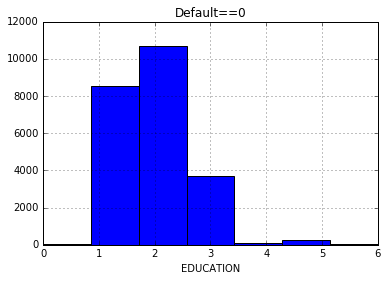

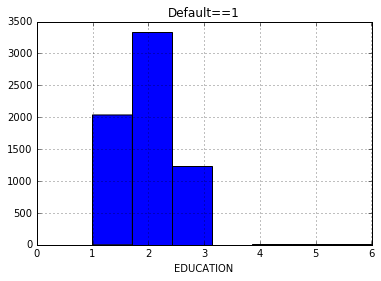

Вероятность дефолта по всей выборке =  0.2212 , 95% доверительный интервал:  (0.21650329809952445, 0.22589670190047556)
Education =  0
Количество объектов =  14
Вероятность дефолта =  0.0
Доверительный интервал:  (2.7755575615628914e-17, 0.21531080273763586)
P-value =  0.05033286121
Нулевая гипотеза отвергнута:  False
Education =  1
Количество объектов =  10585
Вероятность дефолта =  0.192347661786
Доверительный интервал:  (0.18483907261273544, 0.19985625095835571)
P-value =  8.5590255728e-13
Нулевая гипотеза отвергнута:  True
Education =  2
Количество объектов =  14030
Вероятность дефолта =  0.237348538845
Доверительный интервал:  (0.23030849133419215, 0.24438858635647073)
P-value =  4.05647636322e-06
Нулевая гипотеза отвергнута:  True
Education =  3
Количество объектов =  4917
Вероятность дефолта =  0.251576164328
Доверительный интервал:  (0.2394476798217757, 0.26370464883390865)
P-value =  2.86844139275e-07
Нулевая гипотеза отвергнута:  True
Education =  4
Количество объектов =  123

In [69]:
p1 = data_ok['EDUCATION'].hist(bins=7)
p1.set_title('Default==0')
p1.set_xlabel('EDUCATION')
pylab.show()
p2 = data_default['EDUCATION'].hist(bins=7)
p2.set_title('Default==1')
p2.set_xlabel('EDUCATION')
p2.axis([0,6,0,3500])
pylab.show()

from scipy.stats import binom_test
from scipy.stats import norm
from statsmodels.stats.multitest import multipletests
def z_test(successes_failures,p):
    successes = successes_failures[0]
    failures = successes_failures[1]
    p_observed = float(successes) / (successes + failures)
    z_score = np.absolute(np.sqrt(successes + failures) * (p_observed - p) / np.sqrt(p * (1-p)))
    return 2 * norm.sf(z_score)

p_vals = []
default_probas = []
total_counts = []
conf_ints = []
for i in range(7):
    try:
        ok_count = data_ok['EDUCATION'].value_counts()[i]
    # Если какое-то значение не представлено в таблице, будет сгенерировано исключение
    # Для нас это значит, что количество объектов с таким EDUCATION равно 0
    except KeyError:
        ok_count = 0
    try:
        default_count = data_default['EDUCATION'].value_counts()[i]
    except KeyError:
        default_count = 0
    total_count = ok_count + default_count
    default_probas.append(float(default_count)/total_count)
    total_counts.append(total_count)
    if (total_count<200) or (default_count<100) or (ok_count<100):
        p_vals.append(binom_test([default_count,ok_count],p=float(len(data_default))/len(data)))
        conf_ints.append(proportion_confint(default_count,total_count,0.05,method = 'wilson'))
    else:
        p_vals.append(z_test([default_count,ok_count],p=float(len(data_default))/len(data)))
        conf_ints.append(proportion_confint(default_count,total_count,0.05,method = 'normal'))
        
reject = multipletests(p_vals,alpha=0.05,method='holm')[0]
print 'Вероятность дефолта по всей выборке = ', float(len(data_default))/len(data), \
                ', 95% доверительный интервал: ', proportion_confint(len(data_default),len(data),0.05,method = 'normal')
for i in range(7):
    print 'Education = ', i
    print 'Количество объектов = ', total_counts[i]
    print 'Вероятность дефолта = ', default_probas[i]
    print 'Доверительный интервал: ', conf_ints[i]
    print 'P-value = ', p_vals[i]
    print 'Нулевая гипотеза отвергнута: ', reject[i]
print 'Количество объектов с default==1 в зависимости от EDUCATION: \n', data_default['EDUCATION'].value_counts()
print 'Количество объектов с default==0 в зависимости от EDUCATION: \n', data_ok['EDUCATION'].value_counts()

Видим, что нулевая гипотеза отвергается при наличии хоть сколько-нибудь значительного количества объектов с заданным уровнем образования (в пяти группах из семи). Не отвергаются нулевые гипотезы только в случае EDUCATION==0 (всего 14 объектов) и EDUCATION==6 (51 объект). Учитывая, что точечные оценки вероятности для этих групп достаточно сильно отклоняются от среднего, можно сказать, что у нас просто недостаточно данных чтобы уверенно отвергнуть H0 в этих случаях.
То есть, данные показывают, что вероятность дефолта статистически значимо зависит от образования (кроме докторов наук и "нет данных").
Наименее вероятен дефолт у людей с начальным образованием, наиболее - у выпускников школы. Отличия очень большие, это имеет практическую значимость.

Для MARRIAGE мы можем сделать все то же самое, что сделали для EDUCATION.

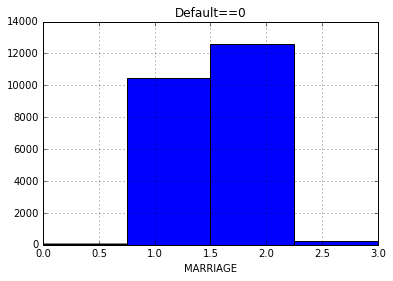

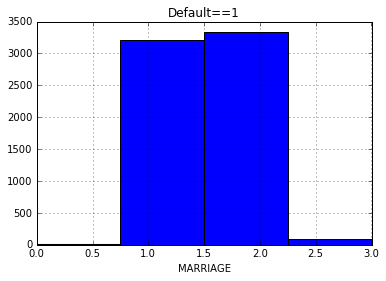

Вероятность дефолта по всей выборке =  0.2212 , 95% доверительный интервал:  (0.21650329809952445, 0.22589670190047556)
Marriage =  0
Количество объектов =  54
Вероятность дефолта =  0.0925925925926
Доверительный интервал:  (0.040201134757029452, 0.19909882590962685)
P-value =  0.0209265091791
Нулевая гипотеза отвергнута:  True
P-value corrected =  0.0418530183583
Marriage =  1
Количество объектов =  13659
Вероятность дефолта =  0.234717036386
Доверительный интервал:  (0.22760945293217713, 0.24182461984035378)
P-value =  0.000141149283412
Нулевая гипотеза отвергнута:  True
P-value corrected =  0.000564597133649
Marriage =  2
Количество объектов =  15964
Вероятность дефолта =  0.209283387622
Доверительный интервал:  (0.20297301446882615, 0.21559376077547354)
P-value =  0.00028607958953
Нулевая гипотеза отвергнута:  True
P-value corrected =  0.000858238768591
Marriage =  3
Количество объектов =  323
Вероятность дефолта =  0.260061919505
Доверительный интервал:  (0.21524131462368534, 0.31

In [70]:
p1 = data_ok['MARRIAGE'].hist(bins=4)
p1.set_title('Default==0')
p1.set_xlabel('MARRIAGE')
pylab.show()
p2 = data_default['MARRIAGE'].hist(bins=4)
p2.set_title('Default==1')
p2.set_xlabel('MARRIAGE')
pylab.show()

p_vals = []
default_probas = []
total_counts = []
conf_ints = []
for i in range(4):
    try:
        ok_count = data_ok['MARRIAGE'].value_counts()[i]
    except KeyError:
        ok_count = 0
    try:
        default_count = data_default['MARRIAGE'].value_counts()[i]
    except KeyError:
        default_count = 0
    total_count = ok_count + default_count
    default_probas.append(float(default_count)/total_count)
    total_counts.append(total_count)
    if (total_count<200) or (default_count<100) or (ok_count<100):
        p_vals.append(binom_test([default_count,ok_count],p=float(len(data_default))/len(data)))
        conf_ints.append(proportion_confint(default_count,total_count,0.05,method = 'wilson'))
    else:
        p_vals.append(z_test([default_count,ok_count],p=float(len(data_default))/len(data)))
        conf_ints.append(proportion_confint(default_count,total_count,0.05,method = 'normal'))

reject, p_corrected = multipletests(p_vals,alpha=0.05,method='holm')[0:2]
print 'Вероятность дефолта по всей выборке = ', float(len(data_default))/len(data), \
                ', 95% доверительный интервал: ', proportion_confint(len(data_default),len(data),0.05,method = 'normal')

for i in range(4):
    print 'Marriage = ', i
    print 'Количество объектов = ', total_counts[i]
    print 'Вероятность дефолта = ', default_probas[i]
    print 'Доверительный интервал: ', conf_ints[i]
    print 'P-value = ', p_vals[i]
    print 'Нулевая гипотеза отвергнута: ', reject[i]
    print 'P-value corrected = ', p_corrected[i]
print 'Table for non-default: \n', data_ok['MARRIAGE'].value_counts()
print 'Table for default: \n', data_default['MARRIAGE'].value_counts()

Для MARRIAGE мы отвергли нулевую гипотезу для значений 0, 1 и 2 на уровне значимости 0.05. Скорректированный p-value для MARRIAGE=3 получился 0.09, что также достаточно мало и может быть отвергнуто на более либеральном уровне значимости 0.1.
Отличия для MARRIAGE 0, 1 и 2 точно имеют практическую значимость, для 3 скорее нет.

Для возраста мы будем делать то же самое: построим доверительные интервалы для медиан при помощи бутстрепа и проверим гипотезу о равенстве распределений в выборках клиентов с дефолтом и без против альтернативы сдвига при помощи критерия Манна-Уитни

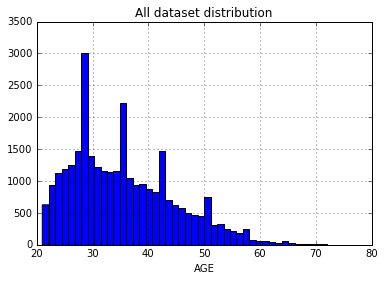

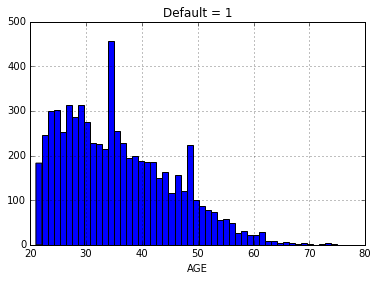

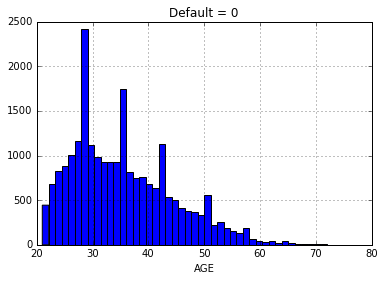

Медиана по всей выборке =  34.0 , среднее =  35.4855 , 95% доверительный интервал:  [ 23.  56.]
Медиана при default==1 =  34.0 , среднее =  35.7257383966 , 95% доверительный интервал:  [ 22.  57.]
Медиана при default==0 =  34.0 , среднее =  35.4172658791 , 95% доверительный интервал:  [ 23.  56.]
MannwhitneyuResult(statistic=78076624.5, pvalue=0.37250354348986159)


In [56]:
p1 = data['AGE'].hist(bins=50)
p1.set_title('All dataset distribution')
p1.set_xlabel('AGE')
pylab.show()
p2 = data_default['AGE'].hist(bins=50)
p2.set_title('Default = 1')
p2.set_xlabel('AGE')
pylab.show()
p3 = data_ok['AGE'].hist(bins=50)
p3.set_title('Default = 0')
p3.set_xlabel('AGE')
pylab.show()
print 'Медиана по всей выборке = ', data['AGE'].median(),', среднее = ', data['AGE'].mean(), ', 95% доверительный интервал: ', \
                        stat_intervals(get_bootstrap_samples(data['AGE'].values,1000),0.05)
print 'Медиана при default==1 = ', data_default['AGE'].median(), \
                           ', среднее = ', data_default['AGE'].mean(), ', 95% доверительный интервал: ', \
                         stat_intervals(get_bootstrap_samples(data_default['AGE'].values,1000),0.05)
print 'Медиана при default==0 = ', data_ok['AGE'].median(), \
                           ', среднее = ', data_ok['AGE'].mean(), ', 95% доверительный интервал: ', \
                        stat_intervals(get_bootstrap_samples(data_ok['AGE'].values,1000),0.05)
print mannwhitneyu(data_default['AGE'],data_ok['AGE'],alternative='two-sided')

Критерий Манна-Уитни не отвергает нулевую гипотезу, медианы совпадают, доверительные интервалы практически идентичны.
Однако мы видим отличие мат ожиданий, что дает основания полагать, что все же распределения не идентичны. При default==1 мы наблюдаем чуть более тяжелый правый хвост и несколько большее мат ожидание. Известно, что перестановочный критерий обладает большей мощностью, попробуем применить его в этой задаче. Используем критерий для независимых выборок и будем проверять гипотезу равенства распределений против двухсторонней альтернативы.

In [60]:
def permutation_t_stat_ind(sample1, sample2):
    return np.mean(sample1) - np.mean(sample2)
def get_random_combinations(n1, n2, max_combinations):
    index = range(n1 + n2)
    indices = set([tuple(index)])
    for i in range(max_combinations - 1):
        np.random.shuffle(index)
        indices.add(tuple(index))
    return [(index[:n1], index[n1:]) for index in indices]
def permutation_zero_dist_ind(sample1, sample2, max_combinations = None):
    joined_sample = np.hstack((sample1, sample2))
    n1 = len(sample1)
    n = len(joined_sample)
    
    if max_combinations:
        indices = get_random_combinations(n1, len(sample2), max_combinations)
    else:
        indices = [(list(index), filter(lambda i: i not in index, range(n))) \
                    for index in itertools.combinations(range(n), n1)]
    
    distr = [joined_sample[list(i[0])].mean() - joined_sample[list(i[1])].mean() \
             for i in indices]
    return distr
def permutation_test(sample, mean, max_permutations = None, alternative = 'two-sided'):
    if alternative not in ('two-sided', 'less', 'greater'):
        raise ValueError("alternative not recognized\n"
                         "should be 'two-sided', 'less' or 'greater'")
    
    t_stat = permutation_t_stat_ind(sample, mean)
    
    zero_distr = permutation_zero_dist_ind(sample, mean, max_permutations)
    
    if alternative == 'two-sided':
        return sum([1. if abs(x) >= abs(t_stat) else 0. for x in zero_distr]) / len(zero_distr)
    
    if alternative == 'less':
        return sum([1. if x <= t_stat else 0. for x in zero_distr]) / len(zero_distr)

    if alternative == 'greater':
        return sum([1. if x >= t_stat else 0. for x in zero_distr]) / len(zero_distr)
print 'P-value = ', permutation_test(data_default['AGE'],data_ok['AGE'],max_permutations=10000)

P-value =  0.0164


Этим критерием нулевая гипотеза отвергается. Также гипотезу о равенстве мат ожиданий достаточно уверенно отвергает z-критерий для независимых выборок (учитывая объем выборки мы вполне можем его использовать).

In [61]:
from statsmodels.stats.weightstats import ztest
print 'P-value = ', ztest(data_default['AGE'],data_ok['AGE'])[1]

P-value =  0.0161308354072


Практическая значимость состоит в том, что при выдаче кредитов пожилым людям политика должна быть более гибкой. Показать, что неравенство мат ожиданий обусловлено именно правым хвостом несложно: обрезая распределение справа (для значений AGE>tr), где tr - это выбираемый нами порог, мы можем очень сильно увеличить p-value при проверке распределений на идентичность.

In [72]:
tr=60
data_default1 = data_default[data_default['AGE']<tr]
data_ok1 = data_ok[data_ok['AGE']<tr]
print 'P-value (z-test) = ', ztest(data_default1['AGE'],data_ok1['AGE'])[1]
print 'P-value (permutation test) = ', permutation_test(data_default1['AGE'],data_ok1['AGE'],max_permutations=10000)

P-value (z-test) =  0.101583894325
P-value (permutation test) =  0.1009
